In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [8]:
# Standardize features (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [9]:
# Compute the covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues (and corresponding eigenvectors) in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

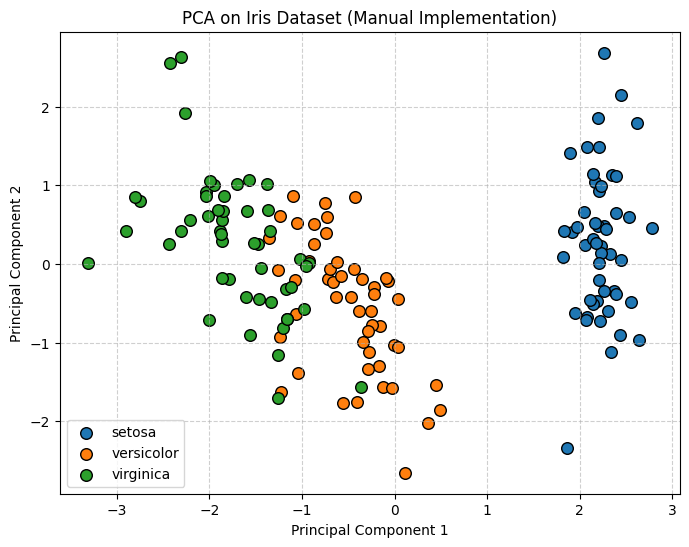

In [12]:
# Select the top 2 eigenvectors (principal components)
W = eigenvectors[:, :2]

# Project the data onto the new 2D space
X_pca = X_std @ W

# Create a DataFrame for visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, target_name in enumerate(target_names):
    plt.scatter(
        df_pca.loc[df_pca['target'] == i, 'PC1'],
        df_pca.loc[df_pca['target'] == i, 'PC2'],
        label=target_name,
        color=colors[i],
        edgecolor='k',
        s=70
    )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset (Manual Implementation)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
